# Breast Cancer Diagnosis Prediction using KNN

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

def snjy():
    print("SANJAY R - 24BAD407")

## 1. Load Dataset

In [10]:
snjy()
data = pd.read_csv('/kaggle/input/datasets/yasserh/breast-cancer-dataset/breast-cancer.csv')
data.head()

SANJAY R - 24BAD407


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2. Data Preprocessing

In [11]:
snjy()
# Selecting specified features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
X = data[features]
y = data['diagnosis']

# Encoding target labels: M -> 1, B -> 0
le = LabelEncoder()
y = le.fit_transform(y)

print("Feature shape:", X.shape)
print("Target distribution:", np.bincount(y))

SANJAY R - 24BAD407
Feature shape: (569, 5)
Target distribution: [357 212]


## 3. Train-Test Split and Scaling

In [12]:
snjy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SANJAY R - 24BAD407


## 4. KNN Classification and Experimenting with K

SANJAY R - 24BAD407


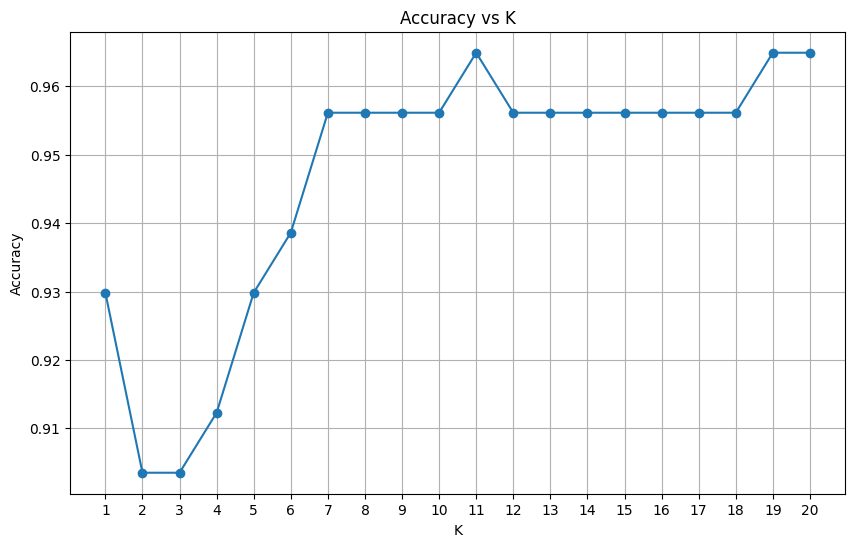

Best K value: 11 with accuracy: 0.9649


In [13]:
snjy()
accuracies = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(accuracies)]
print(f"Best K value: {best_k} with accuracy: {max(accuracies):.4f}")

## 5. Final Model Evaluation

SANJAY R - 24BAD407
Accuracy: 0.9649122807017544
Precision: 0.9534883720930233
Recall: 0.9534883720930233
F1 Score: 0.9534883720930233


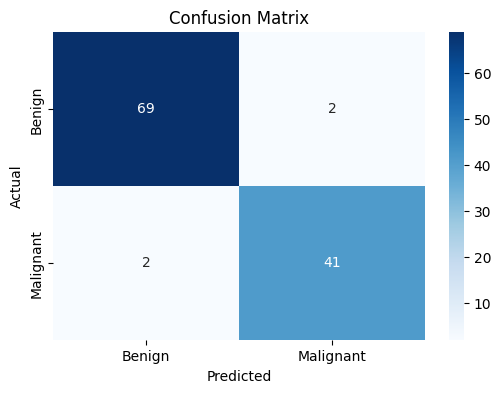

In [14]:
snjy()
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall:", recall_score(y_test, y_pred_final))
print("F1 Score:", f1_score(y_test, y_pred_final))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 6. Identifying Misclassified Cases

In [15]:
snjy()
misclassified = np.where(y_test != y_pred_final)[0]
print(f"Number of misclassified cases: {len(misclassified)}")
if len(misclassified) > 0:
    print("Index of misclassified cases in test set:", misclassified)
    # Get actual features for misclassified cases
    misclassified_features = X_test[misclassified]
    # Inverse transform to original scaling for better understanding
    original_misclassified = scaler.inverse_transform(misclassified_features)
    misclassified_df = pd.DataFrame(original_misclassified, columns=features)
    misclassified_df['Actual'] = y_test[misclassified]
    misclassified_df['Predicted'] = y_pred_final[misclassified]
    print("\nMisclassified Samples Detail:")
    print(misclassified_df)

SANJAY R - 24BAD407
Number of misclassified cases: 4
Index of misclassified cases in test set: [20 39 52 77]

Misclassified Samples Detail:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        13.80         15.79           90.43      584.1          0.10070   
1        14.62         24.02           94.57      662.7          0.08974   
2        13.11         22.54           87.02      529.4          0.10020   
3        13.96         17.05           91.43      602.4          0.10960   

   Actual  Predicted  
0       1          0  
1       0          1  
2       0          1  
3       1          0  


## 7. Decision Boundary Visualization

SANJAY R - 24BAD407


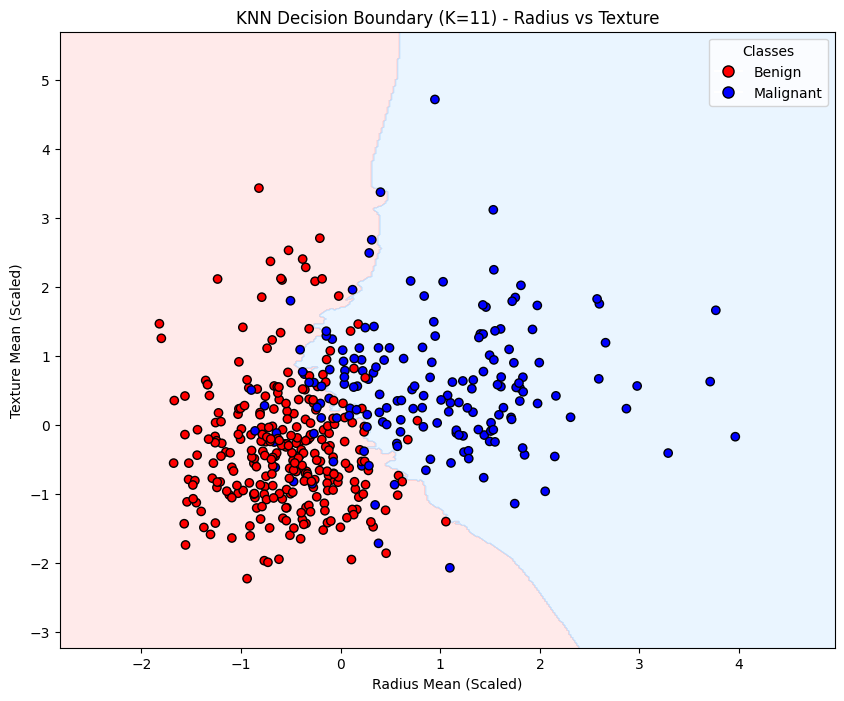

In [16]:
snjy()
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D


# Use first two features
X_vis = X_train[:, :2]

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis, y_train)

# Create mesh grid
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Predict on grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Custom colors
cmap_light = ListedColormap(['#FFBBBB', '#BBDEFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(10, 8))

# Decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Training points
plt.scatter(
    X_vis[:, 0],
    X_vis[:, 1],
    c=y_train,
    edgecolor='k',
    cmap=cmap_bold
)

plt.xlabel('Radius Mean (Scaled)')
plt.ylabel('Texture Mean (Scaled)')
plt.title(f'KNN Decision Boundary (K={best_k}) - Radius vs Texture')

# Legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Benign',
           markerfacecolor='red', markersize=8, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Malignant',
           markerfacecolor='blue', markersize=8, markeredgecolor='k')
]

plt.legend(handles=legend_elements, title="Classes")
plt.show()